In [1]:
import uptide
import uptide.tidal_netcdf
import os.path
import datetime
import numpy as np
import utm
import sys
import matplotlib.pyplot as plt
import csv
import pandas as pd
import fes

In [2]:
ls

dd.txt                            rvk_mmyy_tide.ipynb
fes_slev.py                       sedtricks.sh
fes_uv.py                         ssh_sharp2017.ipynb
gmt_tides/                        stromsurge_ioc_rvk_fes2014 .ipynb
iceland_tides_fes2014.ipynb       Sud_Flat15jan01march.csv
ioc_rvk_jan23.txt                 test saving grd file.ipynb
kd_flateyri_2020.txt              tide_gauge_fes2014.ipynb
kd_fla.txt                        tide_gauge_for_Vala_fes2014.ipynb
kd_rvk_ssh.txt                    tide_gauge_validation_iceland_fes2014.ipynb
kd_ss.txt                         tides_62.4N_21.8W_102019_022020.csv
kd_sudureyri_2020.txt             Untitled1.ipynb
kevin_rvk_ssh.txt                 Untitled2.ipynb
kkk.txt                           Untitled3.ipynb
kkoutput.file                     Untitled4.ipynb
mask_data_for_finding_edge.ipynb  Untitled5.ipynb
max_tide_iceland.ipynb            Untitled6.ipynb
max_tide.txt                      Untitled7.ipynb
min_tide_iceland.ipynb          

In [3]:
rvk = pd.read_csv('rvk_example.txt', sep = '\t', names = ['ssh'], index_col = 0)

In [4]:
rvk.index = pd.to_datetime(rvk.index)

In [5]:
pp=rvk.to_numpy

In [6]:
rvk['ssh_corrected']=rvk['ssh']-02.442

/home/angel/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


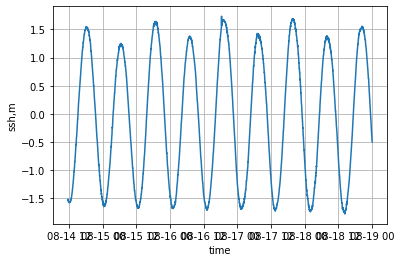

In [7]:
plt.plot(rvk['2019-08-14 00:00':'2019-08-19 00:00:00']['ssh']-2.442)
plt.xlabel('time')
plt.ylabel('ssh,m')
plt.grid(True)
plt.gca().xaxis.grid(True, which='minor')  # minor grid on too


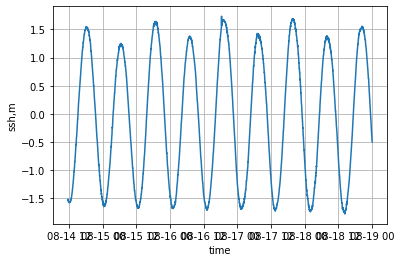

In [8]:
plt.plot(rvk['2019-08-14 00:00':'2019-08-19 00:00:00']['ssh_corrected'])
plt.xlabel('time')
plt.ylabel('ssh,m')
plt.grid(True)
plt.gca().xaxis.grid(True, which='minor')  # minor grid on too

In [13]:
kk=rvk['2019-08-14 00:00':'2019-08-19 00:00:00']['ssh_corrected']

In [14]:
#### here we start defining the fes variables. 
def extract_series(tnci, ll, trange):
    etas = []
    for t in trange:
        tnci.set_time(t)
        eta = tnci.get_val(ll)
        etas.append(eta)
    return etas

In [15]:
tide = uptide.Tides(uptide.ALL_FES2014_TIDAL_CONSTITUENTS)

In [16]:
np.size(uptide.ALL_FES2014_TIDAL_CONSTITUENTS)

33

In [17]:
#tide.set_initial_time(datetime.datetime(2005,3,1,16,0))
#tide.set_initial_time(datetime.datetime(2019,8,14,0,0))
tnci = uptide.FES2014TidalInterpolator('/home/angel/tools/fes-2.9.1-Source/data/fes2014/ocean_tide.ini')

In [18]:
tnci.set_initial_time(datetime.datetime(2020,1,18,0,0))

In [29]:
#Flateyri
lat = 66.038680941256 
lon = 360-23.5197430803136

In [30]:
#65.96/66.2 ; -23.86/-23.26

In [31]:
dt0 = datetime.datetime(2020,1,18,0,0,0)
trange = np.arange(0., 24.*10., 1/60)*3600.
series = {}

#for dt
#tnci.set_time(9*3600)


In [32]:
series['FES2014'] = extract_series(tnci, (lat, lon), trange)

In [33]:
ee = extract_series(tnci, (lat, lon), trange)

In [34]:
np.size(ee)

14400

In [35]:
24*60*10   #the last number correspond to the number of days as in np.arange

14400

In [36]:
arr = dt0 + pd.to_timedelta(np.arange(np.size(ee)), 'm')
#arr = this is making this in minutes 5 days 24hrs/day * 60 min/hr 

In [37]:
arr

DatetimeIndex(['2020-01-18 00:00:00', '2020-01-18 00:01:00',
               '2020-01-18 00:02:00', '2020-01-18 00:03:00',
               '2020-01-18 00:04:00', '2020-01-18 00:05:00',
               '2020-01-18 00:06:00', '2020-01-18 00:07:00',
               '2020-01-18 00:08:00', '2020-01-18 00:09:00',
               ...
               '2020-01-27 23:50:00', '2020-01-27 23:51:00',
               '2020-01-27 23:52:00', '2020-01-27 23:53:00',
               '2020-01-27 23:54:00', '2020-01-27 23:55:00',
               '2020-01-27 23:56:00', '2020-01-27 23:57:00',
               '2020-01-27 23:58:00', '2020-01-27 23:59:00'],
              dtype='datetime64[ns]', length=14400, freq=None)

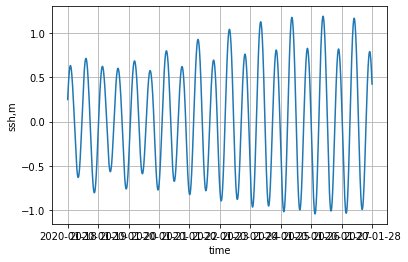

In [38]:
plt.plot(arr,ee)
plt.xlabel('time')
plt.ylabel('ssh,m')
plt.grid(True)

In [22]:
#amp,pha = uptide.harmonic_analysis(tide,kk)

In [122]:
df_fla = pd.DataFrame({'dates_fes':arr,'ssh_fes':ee}).set_index('dates_fes')
### makind the dataframe for flateyri

In [123]:
eta_fla = tnci.get_val((lat, lon))

In [124]:
eta_fla

0.4220992967430724

In [125]:
kd_fla = pd.read_csv('kd_flateyri_2020.txt', sep = '\t', names = ['ssh'], index_col = 0)


In [126]:
kd_fla.index = pd.to_datetime(kd_fla.index)
#kd_fla.index = kev_rvk.index.map(lambda x: datetime.strptime(str(x), '%m-%d-%Y %H:%M'))

In [127]:
kd_fla.index

DatetimeIndex(['2020-01-15 00:20:00', '2020-01-15 00:25:00',
               '2020-01-15 00:30:00', '2020-01-15 00:35:00',
               '2020-01-15 00:40:00', '2020-01-15 00:45:00',
               '2020-01-15 00:50:00', '2020-01-15 00:55:00',
               '2020-01-15 01:00:00', '2020-01-15 01:05:00',
               ...
               '2020-02-29 23:15:00', '2020-02-29 23:20:00',
               '2020-02-29 23:25:00', '2020-02-29 23:30:00',
               '2020-02-29 23:35:00', '2020-02-29 23:40:00',
               '2020-02-29 23:45:00', '2020-02-29 23:50:00',
               '2020-02-29 23:55:00', '2020-03-01 00:00:00'],
              dtype='datetime64[ns]', length=13245, freq=None)

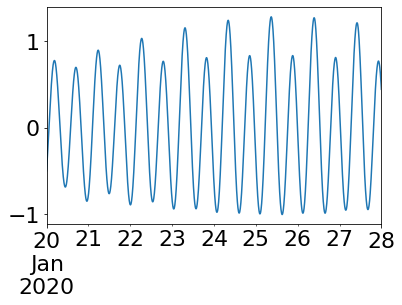

In [128]:
kd_fla.loc['2020-01-20 00:00:00':'2020-01-28 00:00:00','ssh'].plot()

Text(0.5, 1.0, 'Flateyri: January 2020')

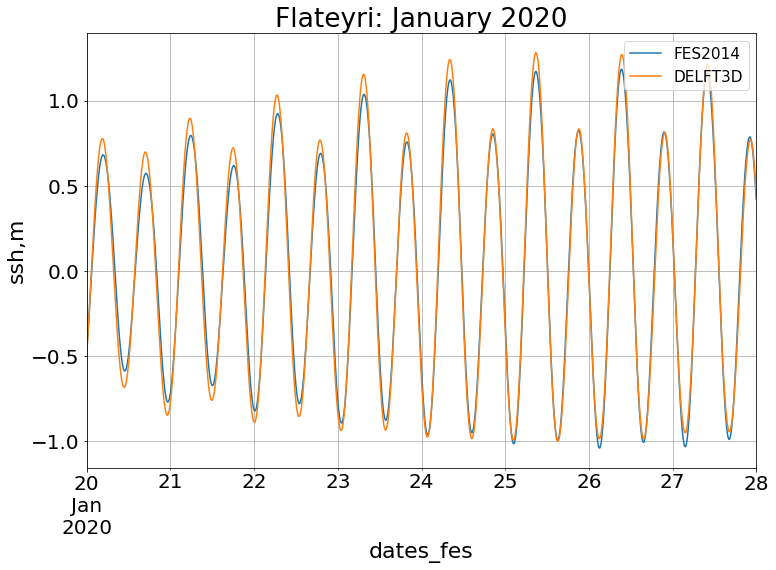

In [129]:
fig,ax=plt.subplots(1,1,figsize=(12,8))
df_fla.loc['2020-01-20 00:00:00':'2020-01-28 00:00:00','ssh_fes'].plot(ax=ax, label='FES2014')
kd_fla.loc['2020-01-20 00:00:00':'2020-01-28 00:00:00','ssh'].plot(ax=ax, label='DELFT3D')
legend=ax.legend(loc='upper right',fontsize = 'x-small')
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)
plt.rcParams.update({'font.size': 22})
plt.ylabel('ssh,m')
plt.grid(True)
plt.gca().xaxis.grid(True, which='minor')  # minor grid on too
#plt.title('Reykjavik, DMI vs OBS: February 2019')
plt.title('Flateyri: January 2020')

In [130]:
#*******************************
#Sudureyri
lat = 66.1351548140552 
lon = 360-23.5266542531583

In [131]:
ee = extract_series(tnci, (lat, lon), trange)
arr = dt0 + pd.to_timedelta(np.arange(np.size(ee)), 'm')
##this is for Sudureyri and will not change the trange, it is the same

In [132]:
df_sud = pd.DataFrame({'dates_fes':arr,'ssh_fes':ee}).set_index('dates_fes')
### makind the dataframe for flateyri

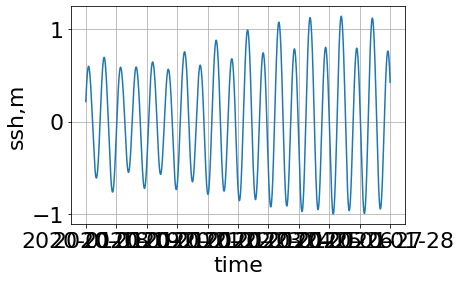

In [133]:
plt.plot(arr,ee)
plt.xlabel('time')
plt.ylabel('ssh,m')
plt.grid(True)

In [134]:
kd_sud = pd.read_csv('kd_sudureyri_2020.txt', sep = '\t', names = ['ssh'], index_col = 0)
kd_sud.index = pd.to_datetime(kd_sud.index)

In [142]:
arr

DatetimeIndex(['2020-01-18 00:00:00', '2020-01-18 00:01:00',
               '2020-01-18 00:02:00', '2020-01-18 00:03:00',
               '2020-01-18 00:04:00', '2020-01-18 00:05:00',
               '2020-01-18 00:06:00', '2020-01-18 00:07:00',
               '2020-01-18 00:08:00', '2020-01-18 00:09:00',
               ...
               '2020-01-27 23:50:00', '2020-01-27 23:51:00',
               '2020-01-27 23:52:00', '2020-01-27 23:53:00',
               '2020-01-27 23:54:00', '2020-01-27 23:55:00',
               '2020-01-27 23:56:00', '2020-01-27 23:57:00',
               '2020-01-27 23:58:00', '2020-01-27 23:59:00'],
              dtype='datetime64[ns]', length=14400, freq=None)

In [143]:
kd_sud.index

DatetimeIndex(['2020-01-15 00:20:00', '2020-01-15 00:25:00',
               '2020-01-15 00:30:00', '2020-01-15 00:35:00',
               '2020-01-15 00:40:00', '2020-01-15 00:45:00',
               '2020-01-15 00:50:00', '2020-01-15 00:55:00',
               '2020-01-15 01:00:00', '2020-01-15 01:05:00',
               ...
               '2020-02-29 23:15:00', '2020-02-29 23:20:00',
               '2020-02-29 23:25:00', '2020-02-29 23:30:00',
               '2020-02-29 23:35:00', '2020-02-29 23:40:00',
               '2020-02-29 23:45:00', '2020-02-29 23:50:00',
               '2020-02-29 23:55:00', '2020-03-01 00:00:00'],
              dtype='datetime64[ns]', length=13245, freq=None)

Text(0.5, 1.0, 'Sudureyri: January 2020')

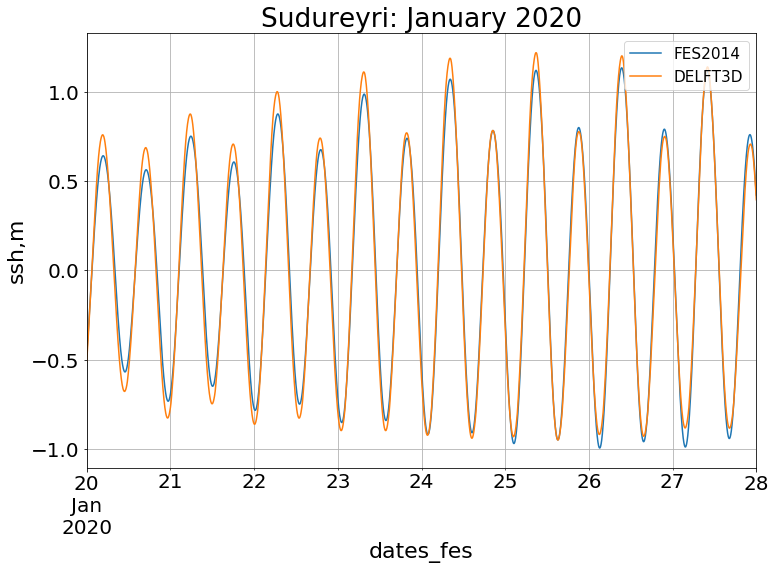

In [135]:
fig,ax=plt.subplots(1,1,figsize=(12,8))
df_sud.loc['2020-01-20 00:00:00':'2020-01-28 00:00:00','ssh_fes'].plot(ax=ax, label='FES2014')
kd_sud.loc['2020-01-20 00:00:00':'2020-01-28 00:00:00','ssh'].plot(ax=ax, label='DELFT3D')
legend=ax.legend(loc='upper right',fontsize = 'x-small')
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)
plt.rcParams.update({'font.size': 22})
plt.ylabel('ssh,m')
plt.grid(True)
plt.gca().xaxis.grid(True, which='minor')  # minor grid on too
#plt.title('Reykjavik, DMI vs OBS: February 2019')
plt.title('Sudureyri: January 2020')

In [141]:
df_sud.ssh_fes.size
kd_sud.ssh.size
#plt.scatter(df_sud.ssh_fes,kd_sud.ssh, marker='^')

13245

In [56]:
df.to_csv('tides_62.4N_21.8W_102019_022020.csv')

Text(0.5, 1.0, 'fes2014 tides')

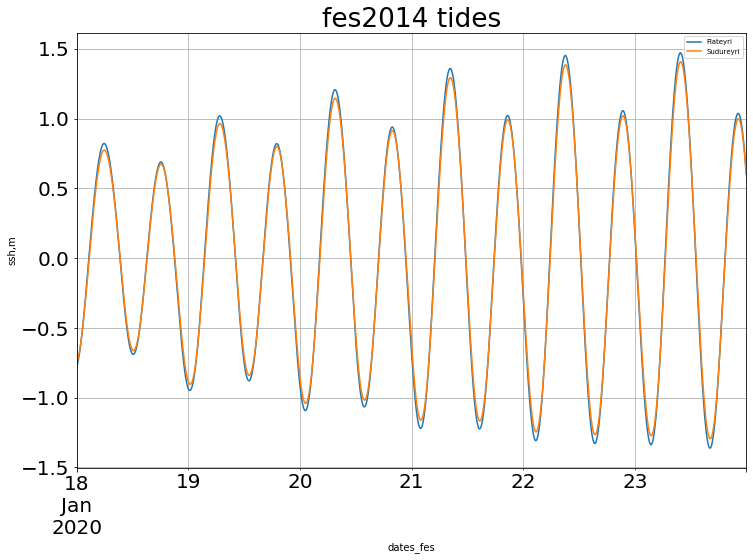

In [41]:
fig,ax=plt.subplots(1,1,figsize=(12,8))
df_fla.loc['2020-01-18 00:00':'2020-01-24 00:00:00','ssh_fes'].plot(ax=ax, label='Flateyri')
df_sud.loc['2020-01-18 00:00':'2020-01-24 00:00:00','ssh_fes'].plot(ax=ax, label='Sudureyri')
legend=ax.legend(loc='upper right',fontsize = 'x-small')
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)
plt.rcParams.update({'font.size': 22})
plt.ylabel('ssh,m')
plt.grid(True)
plt.gca().xaxis.grid(True, which='minor')  # minor grid on too
#plt.title('Reykjavik, DMI vs OBS: February 2019')
plt.title('fes2014 tides')

In [83]:
eta

1.3839459172343624